In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
data_2d = pd.read_csv("data_2d.csv")
data_mnist = pd.read_csv("mnist.csv")


In [51]:
def elbow_method(data, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Внутрішньокластерна сума квадратів (SSE)')
    plt.title('Метод ліктя')
    plt.show()

In [52]:
scaler = StandardScaler()
data_1_scaled = scaler.fit_transform(data_2d)

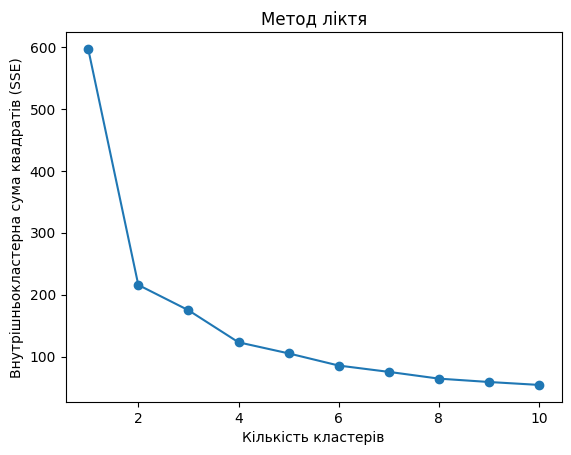

In [53]:
elbow_method(data_1_scaled)

In [54]:
kmeans_2d = KMeans(n_clusters=3, random_state=42)  
kmeans_2d.fit(data_1_scaled)

KMeans(n_clusters=3, random_state=42)

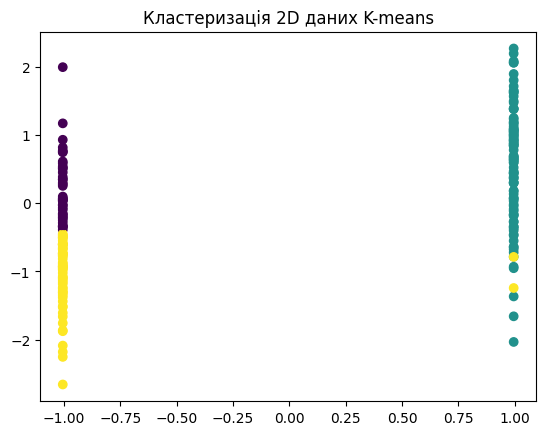

In [55]:
plt.scatter(data_1_scaled[:, 0], data_1_scaled[:, 1], c=kmeans_2d.labels_)
plt.title('Кластеризація 2D даних K-means')
plt.show()

In [56]:
scaler_mnist = StandardScaler()
data_mnist_scaled = scaler_mnist.fit_transform(data_mnist)

In [57]:
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

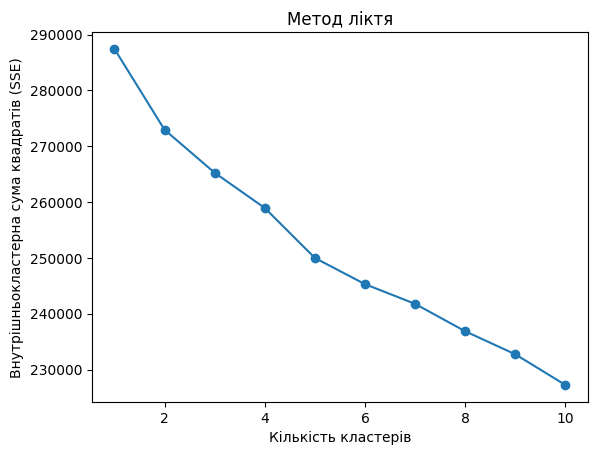

In [58]:
elbow_method(data_mnist_scaled)

In [59]:
kmeans_mnist = KMeans(n_clusters=10, random_state=42)  
kmeans_mnist.fit(data_mnist_scaled)

KMeans(n_clusters=10, random_state=42)

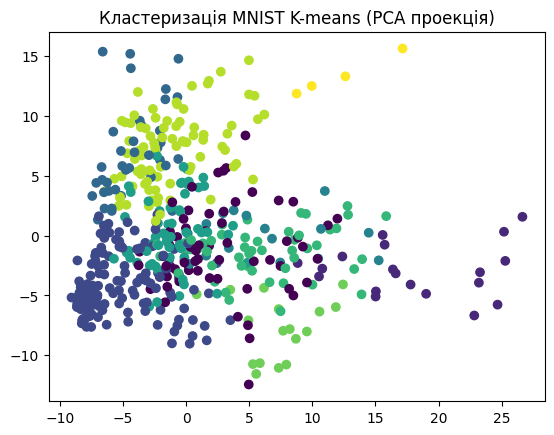

In [60]:
plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=kmeans_mnist.labels_)
plt.title('Кластеризація MNIST K-means (PCA проекція)')
plt.show()